#### Desenvolvido por Mauricio Haruo Matsumura
#### mhmatsumura@yahoo.com.br

## **MINHA ABORDAGEM PARA O DESAFIO "TITANIC" DO KAGGLE.**
- Score obtido com este notebook: 0.80382 de Acurácia (Sem Leakage)
- Ranking do Kaggle: 300º LUGAR
- Encontrei Valor na Coluna TICKET!!
- (Meu melhor Score no Kaggle foi de 0.81818 de Acurácia e 123º lugar no Ranking porém com vazamento de dados: "Leakage")

---
## **Importação dos DADOS:**

In [1]:
# fonte: https://www.kaggle.com/c/titanic

import pandas as pd

df_treino = pd.read_csv('dados/train.csv')
df_teste = pd.read_csv('dados/test.csv')

df_treino_backup = df_treino.copy()
df_teste_backup = df_teste.copy()

---
## **Separando a coluna reposta dos dados de treino:**

In [2]:
coluna_resposta = df_treino['Survived']
df_treino = df_treino.drop('Survived', axis = 1)

---
## **Dados de treino:**

In [3]:
df_treino

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---
## **Dados de teste:**

In [4]:
df_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# solucionando problemas de compatibilidade de versão do matplotlib
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "DejaVu Sans"

---
## **Variáveis sem valor foram excluídas:**
- Estão faltando muitos dados na coluna Cabin. Como 77% são nulos, vamos excluir essa coluna.

In [6]:
df_treino.isnull().mean() # a média de dados nulos me da a porcentagem.

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

- Coluna PassengerId possue muitos valores distintos e portanto não enriquecem o modelo.

In [7]:
len(df_treino['PassengerId'].unique()) # quantidade de tipos distintos na variável PassengerId

891

- Aqui 100% dos dados são distintos.

In [8]:
len(df_treino['PassengerId'].unique())/len(df_treino)*100 # porcentagem de dados distintos na coluna PassengerID

100.0

- Excluindo variáveis Cabin e PassengerId:

In [9]:
treino_teste_df = [df_treino, df_teste] #criando lista contendo os dataframes treino e teste.
for tabela in treino_teste_df:
    
    tabela.drop(['Cabin'], axis = 1, inplace = True)
    tabela.drop(['PassengerId'], axis = 1, inplace = True)

---
## **Variável FARE:**
- Detectei através do gráfico de boxplot e histograma a existência de outlier importante na variável Fare.

<AxesSubplot: >

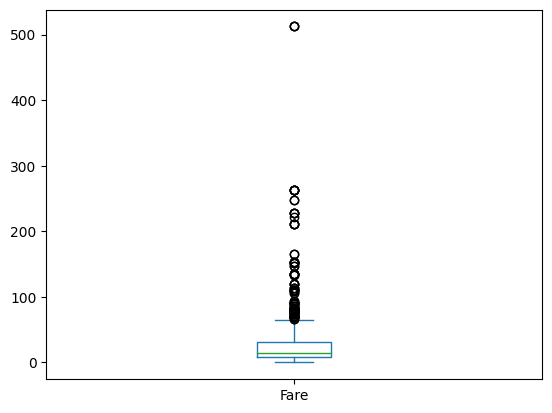

In [10]:
df_treino['Fare'].plot(kind= 'box')

<AxesSubplot: ylabel='Frequency'>

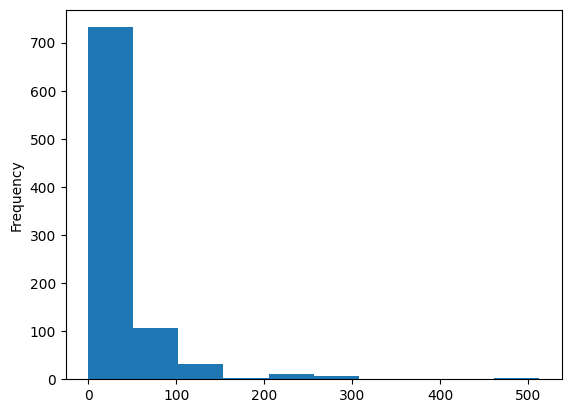

In [11]:
df_treino['Fare'].plot(kind= 'hist')

- A maioria dos Fare estão entre 0 e 50.
- Outlier acima de 500 é um outlier muito extremo aumentando muito o desvio padrão.
- Conclui que não seria eficiente utilizar o desvio padrão para a detecção de outliers.

    - limite Superior = mean + 3 * stdev
    - limite Inferior = mean - 3 * stdev

- Sendo assim ao invés do desvio padrão o outlier foi tratado utilizando a faixa interquartil (FIQ).
- O FIQ é a diferença entre o terceiro e o primeiro quartil, FIQ = Q3 - Q1. 
- Fórmula estatística para encontrar o limite superior do outlier = Q3 + 1.5 * FIQ.

In [12]:
Q3 = df_treino['Fare'].quantile(0.75)
Q1 = df_treino['Fare'].quantile(0.25)
FIQ = Q3 - Q1 
limite_superior_outlier = Q3 + 1.5 * FIQ

for tabela in treino_teste_df:
    
    # encontrando valores acima do limite e substituindo pelo limite:
    tabela.loc[tabela['Fare'] >= limite_superior_outlier, 'Fare'] = limite_superior_outlier 

- Foi encontrado um dado faltante da coluna Fare nos dados de teste.

In [13]:
df_teste['Fare'].isnull().sum() #somatório dos valores nulos

1

- Para preencher esse dado faltante calculei a mediana do valor de Fare nos dados de treino:

In [14]:
for tabela in treino_teste_df:
    
    tabela["Fare"].fillna(tabela['Fare'].median(), inplace=True) #preenchendo valores nulos

---
## **Variável EMBARKED:**
- Valores faltantes de Embarked foram preenchidos pela sua moda dos dados de treino.

In [15]:
df_treino['Embarked'].isnull().sum() #somatório dos valores nulos

2

In [16]:
embarkedMode = df_treino['Embarked'].mode()[0] # calculando a moda

for tabela in treino_teste_df:
    
    tabela['Embarked'] = tabela['Embarked'].fillna(embarkedMode) # preenchendo valores nulos

---
## **Variável TICKET:**
- Apesar de também ter muitos valores distintos, ao tranformá-la em variável ordinária, trouxe valor.
- Aproveitei a parte numérica dos ticket para inferir, supor algumas informações:
- O lado em que os passageiros estavam (PAR OU ÍMPAR).
- E em qual andar do Navio (Número de dígitos).
- Concatenei essas duas informações transformando a coluna Ticket.

In [17]:
print(len(df_treino['Ticket'].unique()))#quantidade de tipos distintos da variável cabin
df_treino['Ticket'].unique()

681


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [18]:
for tabela in treino_teste_df:
    
    # exclui os prefixos restando apenas números:
    tabela['Ticket'] = tabela['Ticket'].apply(lambda x: x.split(' ')[-1]) 
    # dados não númericos foram substituídos pela moda dos dados de treino:
    tabela['Ticket'] = tabela['Ticket'].apply(lambda x: df_treino['Ticket'].mode()[0] if not x.isnumeric() else x)
    # criado coluna auxiliar para calcular se é par ou ímpar:
    tabela['Lado'] = tabela['Ticket'].apply(lambda x: 'PAR' if int(x)%2 == 0 else 'IMPAR')
    # verificando se o número de dígitos é pequeno ou grande:
    tabela['Ticket'] = tabela['Ticket'].apply(lambda x: 'pequeno' if len(x) < 6 else 'grande')
    # criando nova coluna ticket concatenando as informações obtidas:
    tabela['Ticket'] = tabela.Lado + tabela.Ticket
    # removendo a coluna auxiliar:
    tabela.drop(['Lado'], axis = 1, inplace = True)

In [19]:
df_treino['Ticket'] # resultado da coluna Ticket agora transformada

0      IMPARpequeno
1      IMPARpequeno
2         PARgrande
3       IMPARgrande
4         PARgrande
           ...     
886       PARgrande
887     IMPARgrande
888    IMPARpequeno
889     IMPARgrande
890       PARgrande
Name: Ticket, Length: 891, dtype: object

---
## **Variável TITLE:**

In [20]:
df_treino['Name'] # Coluna "Name"

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- Isolei os prefixos de tratamento e descartei os nomes criando a coluna "Título" :

In [21]:
for tabela in treino_teste_df:
    
    # segmenta o nome por vírgula e pega o segundo termo
    # depois segmenta por ponto e pega o primeiro termo resultando somente o prefixo
    tabela['Titulo'] =tabela['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])
           
    tabela.drop(['Name'], axis = 1, inplace = True) # descarta coluna "Name"

In [22]:
df_treino['Titulo'] # coluna "Título" criada a partir da coluna "Name"

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Titulo, Length: 891, dtype: object

- Análisei através de gráficos de pizza quais os prefixos que mais sobreviveram e agrupei.

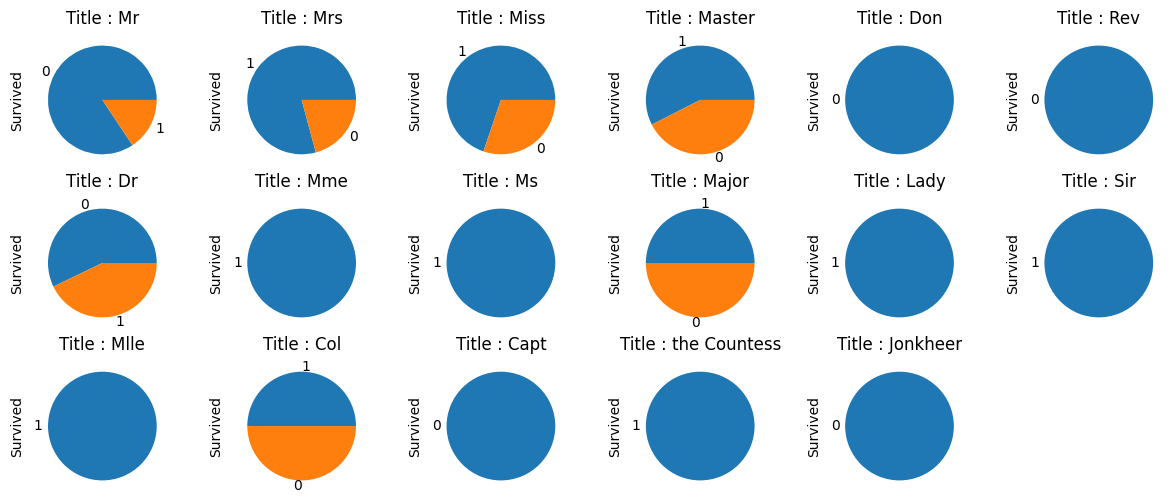

In [23]:
import matplotlib.pyplot as plt

# criando coluna "Name_aux" com os prefixos de tratamento dos nomes
df_treino_backup['Name_aux'] = df_treino_backup['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])

fig = plt.figure(figsize=(15,6))

i=1
for title in df_treino_backup['Name_aux'].unique(): # para cada prefixo distinto conta sobreviventes e plota a pizza
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    df_treino_backup.Survived[df_treino_backup['Name_aux'] == title].value_counts().plot(kind='pie')
    i += 1
    
df_treino_backup.drop(['Name_aux'], axis = 1, inplace = True)  # exclui a coluna auxiliar "Name_aux"

In [24]:
for tabela in treino_teste_df:

    replacement = {
    'Dona' : 'A',
    'Don': 'A',
    'Rev': 'A',
    'Jonkheer': 'A',
    'Capt': 'A',
    'Mr': 'B',
    'Dr': 'C',
    'Col': 'D',
    'Major': 'D',
    'Master': 'E',
    'Miss': 'F',
    'Mrs': 'G',
    'Mme': 'H',
    'Ms': 'H',
    'Mlle': 'H',
    'Sir': 'H',
    'Lady': 'H',
    'the Countess': 'H'
    }
    
    # substituindo conforme a regra criada "replacement"
    tabela['Titulo'] = tabela['Titulo'].apply(lambda x: replacement.get(x)) 

In [25]:
df_treino['Titulo'] # coluna "Título" já transformada em grupos por nível de sobrevivência.

0      B
1      G
2      F
3      G
4      B
      ..
886    A
887    F
888    F
889    B
890    B
Name: Titulo, Length: 891, dtype: object

---
## **Variável AGE:**
- A variável Age possui 19,8% de dados nulos

In [26]:
df_treino.isnull().mean() # media de de valores nulos me dá a porcentagem

Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.000000
Titulo      0.000000
dtype: float64

- Preenchi esses dados faltantes pela mediana, porém agrupando antes por "Título"
- Primeiro criei a coluna com as medianas e aloquei na variável medianasAge

In [27]:
medianasAge = df_treino.groupby('Titulo')['Age'].transform("median") #agrupando por título e calculando a mediana de idade
medianasAge

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    42.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

- Finalmente preenchi os valores nulos utilizando a variável medianaAge como referência:

In [28]:
for tabela in treino_teste_df:
    
    tabela["Age"].fillna(medianasAge, inplace=True) # preenchendo os valores nulos

In [29]:
df_treino["Age"].isnull().sum() # quantidade de valores nulos na coluna "Age"

0

---
## **Variável SIBSP e PARCH:**
- Somei as variáveis sibsp e parch criando a coluna família:

In [30]:
for tabela in treino_teste_df:
    
    tabela['Familia'] = tabela['SibSp'] + tabela['Parch'] + 1

In [31]:
df_treino['Familia'] # Coluna "Familia" criada a partir das colunas sibsp e parch:

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Familia, Length: 891, dtype: int64

- Analisei a taxa de sobrevivência pela quantidade de indivíduos em sua família:

In [32]:
# criei a coluna "Família" também no dataframe de backup:
df_treino_backup['Familia'] = df_treino_backup['SibSp'] + df_treino_backup['Parch'] + 1 
# Agrupei por Familia e extrai a média de sobrevivência o que me da a porcentagem:
sobriventes_X_tamanhoFamilia = df_treino_backup[["Familia", "Survived"]].groupby(['Familia'], as_index=False) \
    .mean().sort_values(by='Survived', ascending=False)
print(sobriventes_X_tamanhoFamilia)

   Familia  Survived
3        4  0.724138
2        3  0.578431
1        2  0.552795
6        7  0.333333
0        1  0.303538
4        5  0.200000
5        6  0.136364
7        8  0.000000
8       11  0.000000


- Identifiquei que a maioria dos sobreviventes tinha 4 ou menos indíviduos em sua família
- Fazia sentido então agrupar em dois grupos que identifiquei como família grande e pequena:

In [33]:
for tabela in treino_teste_df:
    # atribuindo a string "pequena" ou "grande" conforme o tamanho da família:
    tabela['Familia'] = tabela['Familia'].apply(lambda x: 'pequena'if x < 5 else 'grande')
    # descartando as colunas parch e sibsp já transformadas na coluna "Familia":
    tabela.drop(['Parch', 'SibSp'], axis = 1, inplace = True)

In [34]:
df_treino['Familia'] # coluna Família transformada a partir da quantidade de indivíduos.

0      pequena
1      pequena
2      pequena
3      pequena
4      pequena
        ...   
886    pequena
887    pequena
888    pequena
889    pequena
890    pequena
Name: Familia, Length: 891, dtype: object

---
## **PROCESSANDO VARIÁVEIS CATEGÓRICAS:**

In [35]:
variaveis_categoricas = ['Pclass','Sex','Embarked','Titulo','Familia','Ticket']

df_treino[variaveis_categoricas] # imprimindo apenas as variáveis categóricas do cjto de dados.

,Pclass,Sex,Embarked,Titulo,Familia,Ticket
0,3,male,S,B,pequena,IMPARpequeno
1,1,female,C,G,pequena,IMPARpequeno
2,3,female,S,F,pequena,PARgrande
3,1,female,S,G,pequena,IMPARgrande
4,3,male,S,B,pequena,PARgrande
...,...,...,...,...,...,...
886,2,male,S,A,pequena,PARgrande
887,1,female,S,F,pequena,IMPARgrande
888,3,female,S,F,pequena,IMPARpequeno
889,1,male,C,B,pequena,IMPARgrande


- Codifiquei as variáveis categóricas no formato binário( 0 ou 1) utilizando a função do pandas pd.getdummies():

In [36]:
# criando novas colunas no formato binário
df_treino = pd.get_dummies(df_treino, columns = variaveis_categoricas)
df_teste = pd.get_dummies(df_teste, columns = variaveis_categoricas)

In [37]:
df_treino

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Titulo_E,Titulo_F,Titulo_G,Titulo_H,Familia_grande,Familia_pequena,Ticket_IMPARgrande,Ticket_IMPARpequeno,Ticket_PARgrande,Ticket_PARpequeno
0,22.0,7.2500,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,38.0,65.6344,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,35.0,53.1000,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,35.0,8.0500,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
887,19.0,30.0000,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
888,21.0,23.4500,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
889,26.0,30.0000,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0


---
## **PROCESSANDO VARIÁVEIS NUMÉRICAS:**

In [38]:
df_treino[['Fare','Age']] # imprimindo apenas as variáveis numéricas

,Fare,Age
0,7.2500,22.0
1,65.6344,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,21.0
889,30.0000,26.0


- Nivelando todas as variáveis numéricas na mesma escala.
- A função que deu melhor resultado foi a RobustScaler() que lida melhor com outliers.

In [39]:

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()

# transformando as variáveis numéricas utilizando o robust scaler da biblioteca sklearn
df_treino[['Fare','Age']] = scaler.fit_transform(df_treino[['Fare','Age']])
df_teste[['Fare','Age']] = scaler.transform(df_teste[['Fare','Age']])

In [40]:
df_treino[['Fare','Age']] # colunas numéricas já escaladas.

,Fare,Age
0,-0.312011,-0.571429
1,2.216591,0.571429
2,-0.282777,-0.285714
3,1.673732,0.357143
4,-0.277363,0.357143
...,...,...
886,-0.062981,-0.214286
887,0.673281,-0.785714
888,0.389604,-0.642857
889,0.673281,-0.285714


---
## **CRIANDO SETUP DE CLASSIFICAÇÃO DO PYCARET:**

In [41]:
from pycaret.classification import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, pull, \
                               finalize_model, save_model, load_model

setup = setup(data = df_treino,
                target = coluna_resposta,
                normalize = False,
                session_id = 42, 
                fold= 18, 
                fold_strategy='stratifiedkfold', 
                preprocess = False)

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 25)"
4,Transformed data shape,"(891, 25)"
5,Transformed train set shape,"(623, 25)"
6,Transformed test set shape,"(268, 25)"
7,Numeric features,24


- Comparando o desempenho de varios modelos de machine learning ordenando pela acurácia:

In [42]:
melhores = compare_models(n_select = 5, sort= 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8425,0.8836,0.7399,0.8390,0.7796,0.6586,0.6681,0.3417
ridge,Ridge Classifier,0.8279,0.0000,0.7317,0.8089,0.7611,0.6286,0.6367,0.3139
lr,Logistic Regression,0.8264,0.8687,0.7402,0.8009,0.7612,0.6268,0.6356,0.4689
lda,Linear Discriminant Analysis,0.8263,0.8693,0.7274,0.8081,0.7586,0.6249,0.6330,0.3294
knn,K Neighbors Classifier,0.8214,0.8594,0.7103,0.8162,0.7492,0.6127,0.6251,0.3283
lightgbm,Light Gradient Boosting Machine,0.8200,0.8662,0.7189,0.7960,0.7493,0.6105,0.6176,0.3194
nb,Naive Bayes,0.8199,0.8517,0.7488,0.7832,0.7581,0.6159,0.6236,0.4244
rf,Random Forest Classifier,0.8151,0.8635,0.7314,0.7892,0.7510,0.6052,0.6140,0.4233
ada,Ada Boost Classifier,0.8121,0.8696,0.7491,0.7781,0.7504,0.6019,0.6150,0.3339
xgboost,Extreme Gradient Boosting,0.8023,0.8709,0.7192,0.7633,0.7348,0.5784,0.5843,0.3761


---
## **ESCOLHENDO TRÊS MODELOS:**
- Testei várias combinações de modelos para melhorar o desempenho da prospecção.
- Entendi que o sistema de votação funciona melhor com números ímpares.
- O melho score foi alcançado com três modelos.
- Os modelos escolhidos foram gradient boosting (gbc), extratree (et) e support vector machine (svm):

In [43]:
gbc = create_model('gbc')
svm = create_model('svm')
et = create_model('et')
# ridge = create_model('ridge')
# knn = create_model('knn')
# lr = create_model('lr')
# lda = create_model('lda')
# # nb = create_model('nb')
# ada = create_model('ada')
# # # qda = create_model('qda')
# rf = create_model('rf')
# lightgbm = create_model('lightgbm')
# xgboost = create_model('xgboost')


modelo_combinado = blend_models([gbc,svm,et], method = 'hard') # combinando modelos para melhorar a previsão por voto.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.8601,0.6154,0.8889,0.7273,0.6082,0.6301
1,0.8571,0.9196,0.8462,0.7857,0.8148,0.6988,0.7001
2,0.7714,0.8654,0.6154,0.7273,0.6667,0.4946,0.4986
3,0.9429,0.9895,0.9231,0.9231,0.9231,0.8776,0.8776
4,0.8286,0.8147,0.6923,0.8182,0.7500,0.6209,0.6260
5,0.8286,0.9056,0.6923,0.8182,0.7500,0.6209,0.6260
6,0.8571,0.9354,0.9286,0.7647,0.8387,0.7126,0.7235
7,0.8857,0.9014,0.7143,1.0000,0.8333,0.7500,0.7746
8,0.7429,0.7976,0.5000,0.7778,0.6087,0.4304,0.4537


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7714,0.0000,0.6923,0.6923,0.6923,0.5105,0.5105
1,0.7143,0.0000,0.9231,0.5714,0.7059,0.4565,0.5069
2,0.8286,0.0000,0.8462,0.7333,0.7857,0.6441,0.6486
3,0.9429,0.0000,0.9231,0.9231,0.9231,0.8776,0.8776
4,0.8857,0.0000,0.8462,0.8462,0.8462,0.7552,0.7552
5,0.8286,0.0000,0.6923,0.8182,0.7500,0.6209,0.6260
6,0.8000,0.0000,0.8571,0.7059,0.7742,0.5977,0.6068
7,0.8571,0.0000,0.6429,1.0000,0.7826,0.6835,0.7206
8,0.7429,0.0000,0.5000,0.7778,0.6087,0.4304,0.4537


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.8601,0.6154,0.8889,0.7273,0.6082,0.6301
1,0.8000,0.9266,0.7692,0.7143,0.7407,0.5783,0.5794
2,0.7143,0.7500,0.6923,0.6000,0.6429,0.4068,0.4097
3,0.8857,0.9283,0.7692,0.9091,0.8333,0.7473,0.7533
4,0.8000,0.7710,0.6923,0.7500,0.7200,0.5648,0.5659
5,0.7714,0.8794,0.6154,0.7273,0.6667,0.4946,0.4986
6,0.8000,0.9014,0.7143,0.7692,0.7407,0.5783,0.5794
7,0.8857,0.9303,0.7143,1.0000,0.8333,0.7500,0.7746
8,0.8000,0.7942,0.5714,0.8889,0.6957,0.5570,0.5871


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0000,0.6923,0.9000,0.7826,0.6789,0.6919
1,0.8286,0.0000,0.8462,0.7333,0.7857,0.6441,0.6486
2,0.7714,0.0000,0.6923,0.6923,0.6923,0.5105,0.5105
3,0.9429,0.0000,0.9231,0.9231,0.9231,0.8776,0.8776
4,0.8571,0.0000,0.6923,0.9000,0.7826,0.6789,0.6919
5,0.8286,0.0000,0.6923,0.8182,0.7500,0.6209,0.6260
6,0.8571,0.0000,0.8571,0.8000,0.8276,0.7059,0.7071
7,0.8857,0.0000,0.7143,1.0000,0.8333,0.7500,0.7746
8,0.7714,0.0000,0.5000,0.8750,0.6364,0.4872,0.5278


---
## **PREVENDO SOBREVIVENTES :**
- Utilizando o modelo de machine learning criado para prever sobreviventes em dados novos:

In [45]:
pred = predict_model(modelo_combinado, df_teste) # aplicando o modelo  no dataframe de teste
pred['prediction_label'] 

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: prediction_label, Length: 418, dtype: int64

In [46]:
coluna_resposta_previsao = pred['prediction_label'] # extraindo a coluna  de previsão gerada

subm = pd.DataFrame()

subm['PassengerId'] = df_teste_backup['PassengerId']
subm['Survived'] = coluna_resposta_previsao


display(subm)

# SALVANDO CSV E MODELO PYCARET
nome_arquivo = 'submission_PYCARET_gbc,et,svm_18cv_acuracia_08460'
# Salvando csv da submissão em disco
subm.to_csv(nome_arquivo + '.csv', index = False)

# Finalizando o modelo
modelo_final = finalize_model(modelo_combinado)
# Salvando o modelo em formato .PKL
save_model(modelo_final, nome_arquivo)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  VotingClassifier(estimators=[('Gradient Boosting Classifier',
                                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                                           criterion='friedman_mse',
                                                                           init=None,
                                                                           learning_rate=0.1,
                                                                           loss='log_loss',
                                                                           max_depth=3,
                                                                           max_features=None,
                                                                           max_leaf_nodes=None,
                                                  